In [1]:
import numpy as np 
from pathlib import Path
from src import db, fig1, utils
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
%load_ext autoreload
%autoreload 2
from matplotlib import rcParams
default_font = 12
fs_title = 14
rcParams["font.family"] = "Arial"
rcParams["savefig.dpi"] = 300
rcParams["axes.spines.top"] = False
rcParams["axes.spines.right"] = False
rcParams["axes.titlelocation"] = "left"
rcParams["axes.titleweight"] = "normal"
rcParams["font.size"] = default_font
trial_type_palette = ['tab:green', 'tab:red', 'tab:cyan', 'tab:orange'] #rew #nrew #rew_test #nrew_test #GI
from IPython.display import clear_output

In [2]:
areas = ["V1", "medial", "lateral", "anterior"]
ctypes = ["exc", "inh"]
corridor_length = 400

dbase = db.get_sessions()
fday = dbase.query("session == 'first training'")
lday = dbase.query("session == 'last training'")

# load data

In [5]:
zscored = True
behavior_df = pd.read_csv("../data/overall/behavior_df.csv")
overall_acc = np.load(Path(r"C:\Users\labadmin\Documents\category-neural\data\overall\last_training\overall_acc.npy"))
overall_betas = np.load(Path(r"C:\Users\labadmin\Documents\category-neural\data\overall\last_training\overall_betas.npy"))
overall_prob = np.load(Path(r"C:\Users\labadmin\Documents\category-neural\data\overall\last_training\overall_probs.npy"), allow_pickle=True)
first100df = pd.read_csv(r"C:\Users\labadmin\Documents\GeneralizationPaper\Figure1\all_sessions_150_250_first100.csv", index_col=0)
corridor_length = 400
bsize = 25
n_bins = corridor_length // bsize
n_cov = 6
if zscored == True:
    main_dir = Path("../data/overall")
else:
    main_dir = Path("../data/notz/overall")
print(f"Using data from {main_dir}")
reg_names = ["Intercept", "Lick rate", "Speed", "Acceleration", "$\Delta$ Pupil", "$\Delta$ Motion"]
matched_features = np.load(Path(r"C:\Users\labadmin\Documents\category-neural\data\overall\last_training\matched_feature_means.npy"))
non_matched_features = np.load(Path(r"C:\Users\labadmin\Documents\category-neural\data\overall\last_training\nonmatched_feature_means.npy"))
f_labels = ["Lick rate ($Hz$)", "Speed ($cm/s$)", "Acc ($cm s^{-2}$)", "%$\Delta$ Face motion", "%$\Delta$ Pupil size"]
selected_features = [0, 1, 4]
nfeatures = matched_features.shape[1]
first_day_cds = np.load(main_dir / "first_training" / "cod_dirs_0_100.npy")
last_day_matched_cds = np.load(main_dir / "last_training" / "cod_dirs_0_100_matched_updated.npy")
last_day_cds = np.load(main_dir / "last_training" / "cod_dirs_0_100.npy")
gis_first, dis_first, gen_first = fig1.compute_gi(first_day_cds, 100)
gis_last_m, dis_last_m, gen_last_m = fig1.compute_gi(last_day_matched_cds, 100)
gis_last, dis_last, gen_last = fig1.compute_gi(last_day_cds, 100)
gis_first_bin, gis_last_bin, bins = fig1.compute_gi_bins(first_day_cds, last_day_matched_cds, binsize=25, corridor_lim=150)
behavior_df = behavior_df.assign(DI = lambda x: x['rewarded'] - x['non rewarded'], 
                   GI_num = lambda x: x['rewarded test'] - x['non rewarded test'])

Using data from ..\data\overall


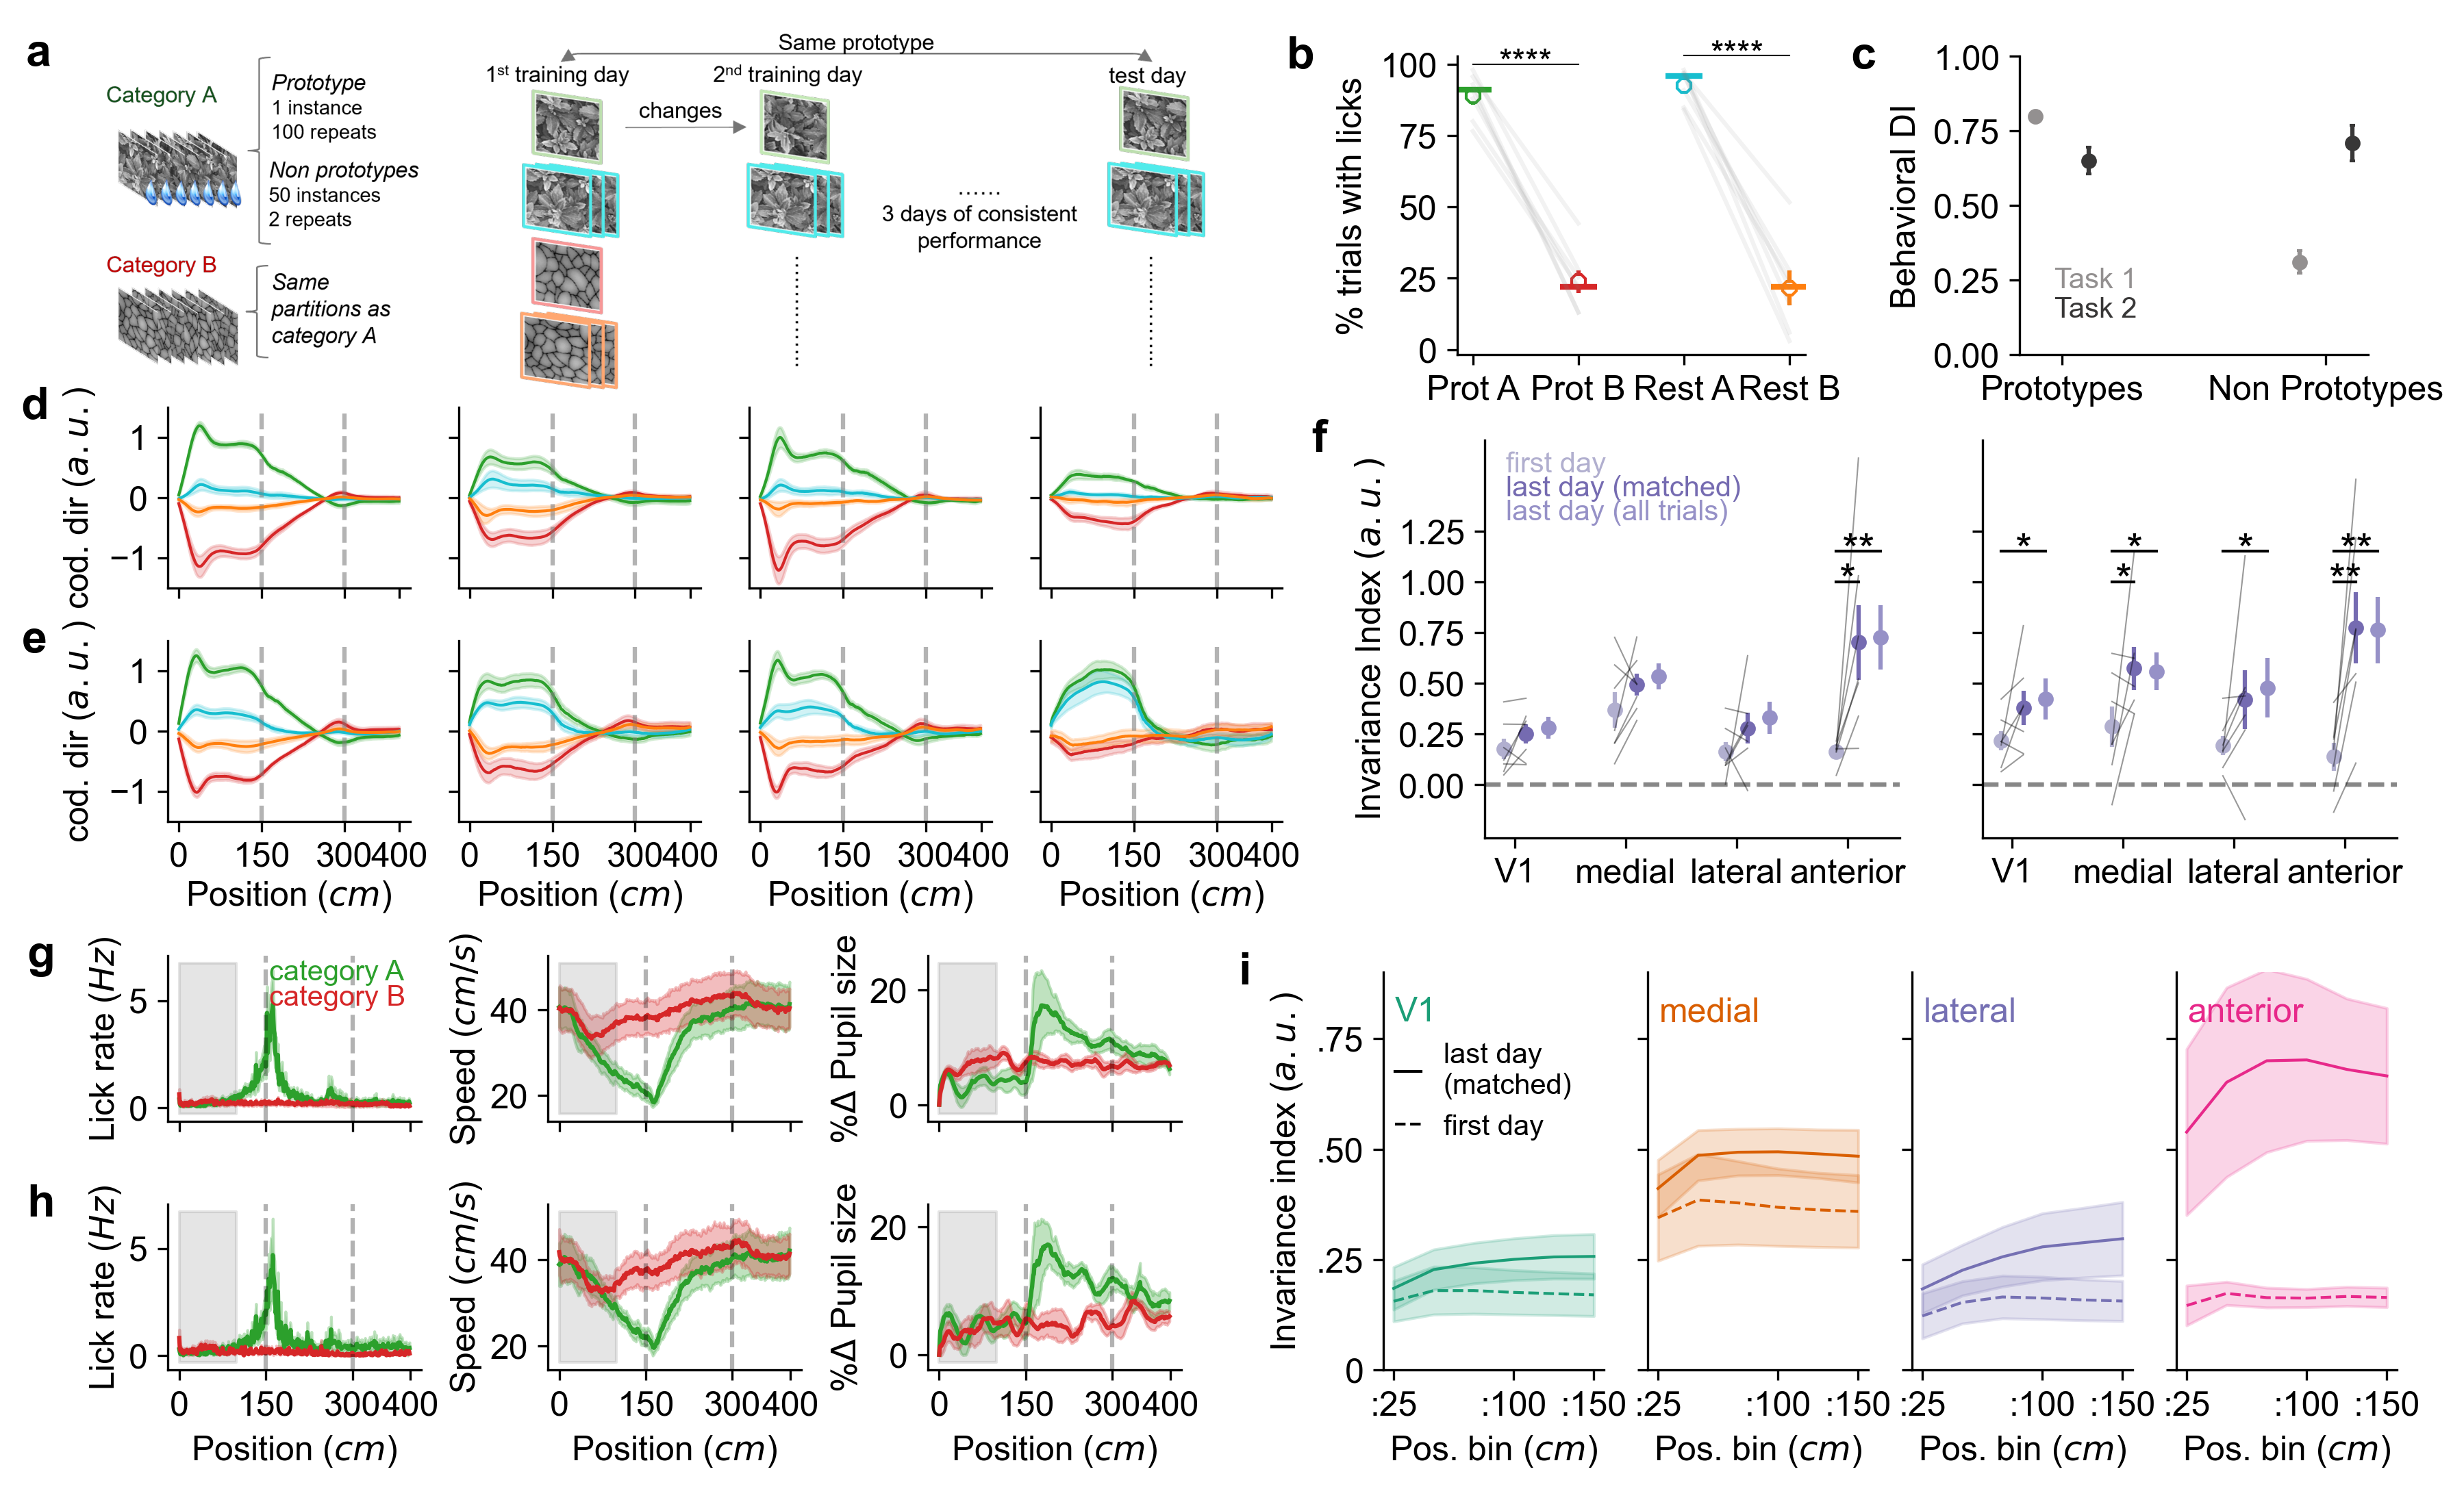

In [27]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec
f = plt.figure(figsize=(14, 8), dpi=300)
grid = GridSpec(6, 4, figure=f)
row1 = GridSpecFromSubplotSpec(1, 3, subplot_spec=grid[0:2, :4], width_ratios=[1, .3, .3], wspace=0.3)
row2 = GridSpecFromSubplotSpec(1, 2, subplot_spec=grid[2:4, :4], width_ratios=[1.1, .9])
row3 = GridSpecFromSubplotSpec(1, 2, subplot_spec=grid[4:6, :4])
cds = GridSpecFromSubplotSpec(2, 4, subplot_spec=row2[0, 0])
cd_quant = GridSpecFromSubplotSpec(1, 2, subplot_spec=row2[0, 1])
across_corridor = GridSpecFromSubplotSpec(1, 4, subplot_spec=row3[0, 1])
behav_match = GridSpecFromSubplotSpec(2, 3, subplot_spec=row3[0, 0], wspace=0.5, hspace=0.4)

img_axs, avg_axs, task_comp = row1.subplots()
cds_axs = cds.subplots(sharex=True, sharey=True)
cd_quant_ax = cd_quant.subplots(sharey=True)
across_axs = across_corridor.subplots(sharex=True, sharey=True)
matched_f_axs = behav_match.subplots(sharex=True)
## FIRT ROW ##
fig1.show_image(img_axs, r"C:\Users\labadmin\Pictures\category_task2.png")
fig1.lick_averages(behavior_df, avg_axs, lines=True, stat_test=True, alpha=1)
fig1.plot_behav_dis(task_comp, behavior_df, first100df)

fig1.move_axis(img_axs, hdx=-.03, vdx=0.04, heightdx=1, widthdx=1)
fig1.move_axis(avg_axs, heightdx=.75, vdx=0.07, hdx=-.02)
fig1.move_axis(task_comp, heightdx=.75, vdx=0.07, hdx=-.01)

## CODING DIRECTIONS ## 
for a, area in enumerate(areas):
    for ttype in range(4):
        fig1.plot_cds(first_day_cds, ttype, a, 0, cds_axs[0, a], references=True)
        fig1.plot_cds(last_day_cds, ttype, a, 0, cds_axs[1, a], references=True)
rows, cols = cds_axs.shape
for i in range(rows):
    for j in range(cols):
        cds_axs[i, j].set_ylim(-1.5, 1.5)
        cds_axs[i, j].set_xticks([0, 150, 300, 400])
        if i == 0:
            fig1.move_axis(cds_axs[i, j], vdx=0.06)
        if i == 1:
            fig1.move_axis(cds_axs[i, j], vdx=0.05)
            cds_axs[i, j].set_xlabel("Position ($cm$)", labelpad=2)
cds_axs[0,0].set_ylabel("cod. dir ($a.u.$)")
cds_axs[1,0].set_ylabel("cod. dir ($a.u.$)")

## CODING DIRECTIONS QUANTIFICATION ##
fig1.plot_gi_comparison_wcontrol(gis_first, gis_last_m,  gis_last, cd_quant_ax)
for ax in cd_quant_ax:
    fig1.move_axis(ax, vdx=0.04)
    #for tick in ax.get_xticklabels():
    #    tick.set_rotation(30)

## MATCHED BEHAVIORAL FEATURES ##
for i_f, fe in enumerate(selected_features):
    fig1.plot_catvsbehav(non_matched_features[:,fe, 0], non_matched_features[:,fe, 1], f_labels[fe], False, matched_f_axs[0, i_f], legend=False)
    fig1.plot_catvsbehav(matched_features[:,fe, 0], matched_features[:,fe, 1], f_labels[fe], True, matched_f_axs[1, i_f], legend=False)
matched_f_axs[0,0].text(.4,.9, "category A", ha='left', va='center', fontsize=10, 
                            color='tab:green', transform=matched_f_axs[0,0].transAxes)
matched_f_axs[0,0].text(.4,.75, "category B", ha='left', va='center', fontsize=10, 
                            color='tab:red', transform=matched_f_axs[0,0].transAxes)
rows, cols = matched_f_axs.shape
for i in range(rows):
    for j in range(cols):
        if i == 0:
            fig1.move_axis(matched_f_axs[i,j], vdx=-0.01)
        else:
            fig1.move_axis(matched_f_axs[i,j], vdx=-0.02)


ctype = 0 # 0 for exc, 1 for inh
for i, ax in enumerate(across_axs):
    fig1.plot_cumulative_gi(ax, gis_first_bin, gis_last_bin, i, ctype, errorbars=False, xlabel='Pos. bin ($cm$)')
    fig1.move_axis(ax, vdx=-0.02)
    ax.set_xticks([0, 3, 5], [':25', ':100', ':150'])
    if i == 0:
        ax.set_ylabel("Invariance index ($a.u.$)")

custom_lines = [
    Line2D([0], [0], color='black', lw=1, linestyle='-'),   
    Line2D([0], [0], color='black', lw=1, linestyle='--')
]

across_axs[0].legend(custom_lines, ['last day\n(matched)', 'first day'], loc=(0,.55), fontsize=10, frameon=False, handlelength=.9)
fig1.add_panel_label(img_axs, 'a', x=-.037, y=.91, fontsize=16, fontweight='bold')
fig1.add_panel_label(avg_axs, 'b', x=-0.45, y=1, fontsize=16, fontweight='bold')
fig1.add_panel_label(task_comp, 'c', x=-0.45, y=1, fontsize=16, fontweight='bold')
fig1.add_panel_label(cds_axs[0,0], 'd', x=-0.55, y=1, fontsize=16, fontweight='bold')
fig1.add_panel_label(cds_axs[1,0], 'e', x=-0.55, y=1, fontsize=16, fontweight='bold')
fig1.add_panel_label(cd_quant_ax[0], 'f', x=-0.4, y=1, fontsize=16, fontweight='bold')
fig1.add_panel_label(matched_f_axs[0,0], 'g', x=-0.5, y=1, fontsize=16, fontweight='bold')
fig1.add_panel_label(matched_f_axs[1,0], 'h', x=-0.5, y=1, fontsize=16, fontweight='bold')
fig1.add_panel_label(across_axs[0], 'i', x=-0.63, y=1, fontsize=16, fontweight='bold')
plt.savefig(r"C:\Users\labadmin\Documents\category-neural\results\figure4.pdf", dpi=300, bbox_inches='tight')

In [7]:
def get_cat_trials(dbase, index):
    """
    Get the trials for a specific category from the database.
    """
    mouse_info = dbase.iloc[index]
    name, date, blk = mouse_info['mname'], mouse_info['datexp'], mouse_info['blk']
    m = utils.load_mouse(name, date, blk, mdl_path="D:\mouseobj")
    catA = np.concatenate([m.trial_dict["rewarded"], m.trial_dict["rewarded test"]])
    catB = np.concatenate([m.trial_dict["non rewarded"], m.trial_dict["non rewarded test"]])
    return catA, catB
    

In [74]:
gis_first[:,1,0], gis_last_m[:,1,0]

(array([0.20525509, 0.2676016 , 0.10373975, 0.47688993, 0.72668057,
        0.59059391, 0.20718159]),
 array([0.375906  , 0.72801665, 0.31681097, 0.61173677, 0.49404281,
        0.4973194 , 0.43339361]))

In [8]:
catA, catB = get_cat_trials(lday, 0)

Checking if model object exists ...
Loading mouse object from D:\mouseobj\VG11\2024_10_31\2
Existing mouse object has the following attributes:
dict_keys(['name', 'datexp', 'blk', 'data_path', '_timeline', '_data_var', '_settings', '_timestamps', '_trial_info', '_spks', '_ypos', '_xpos', '_iplane', '_stat', '_ops', '_snr', 'xy_t', 'iarea', 'iregion', 'outline', 'frameselector', 'isred', 'trial_dict', 'interp_spks', 'train_dp'])


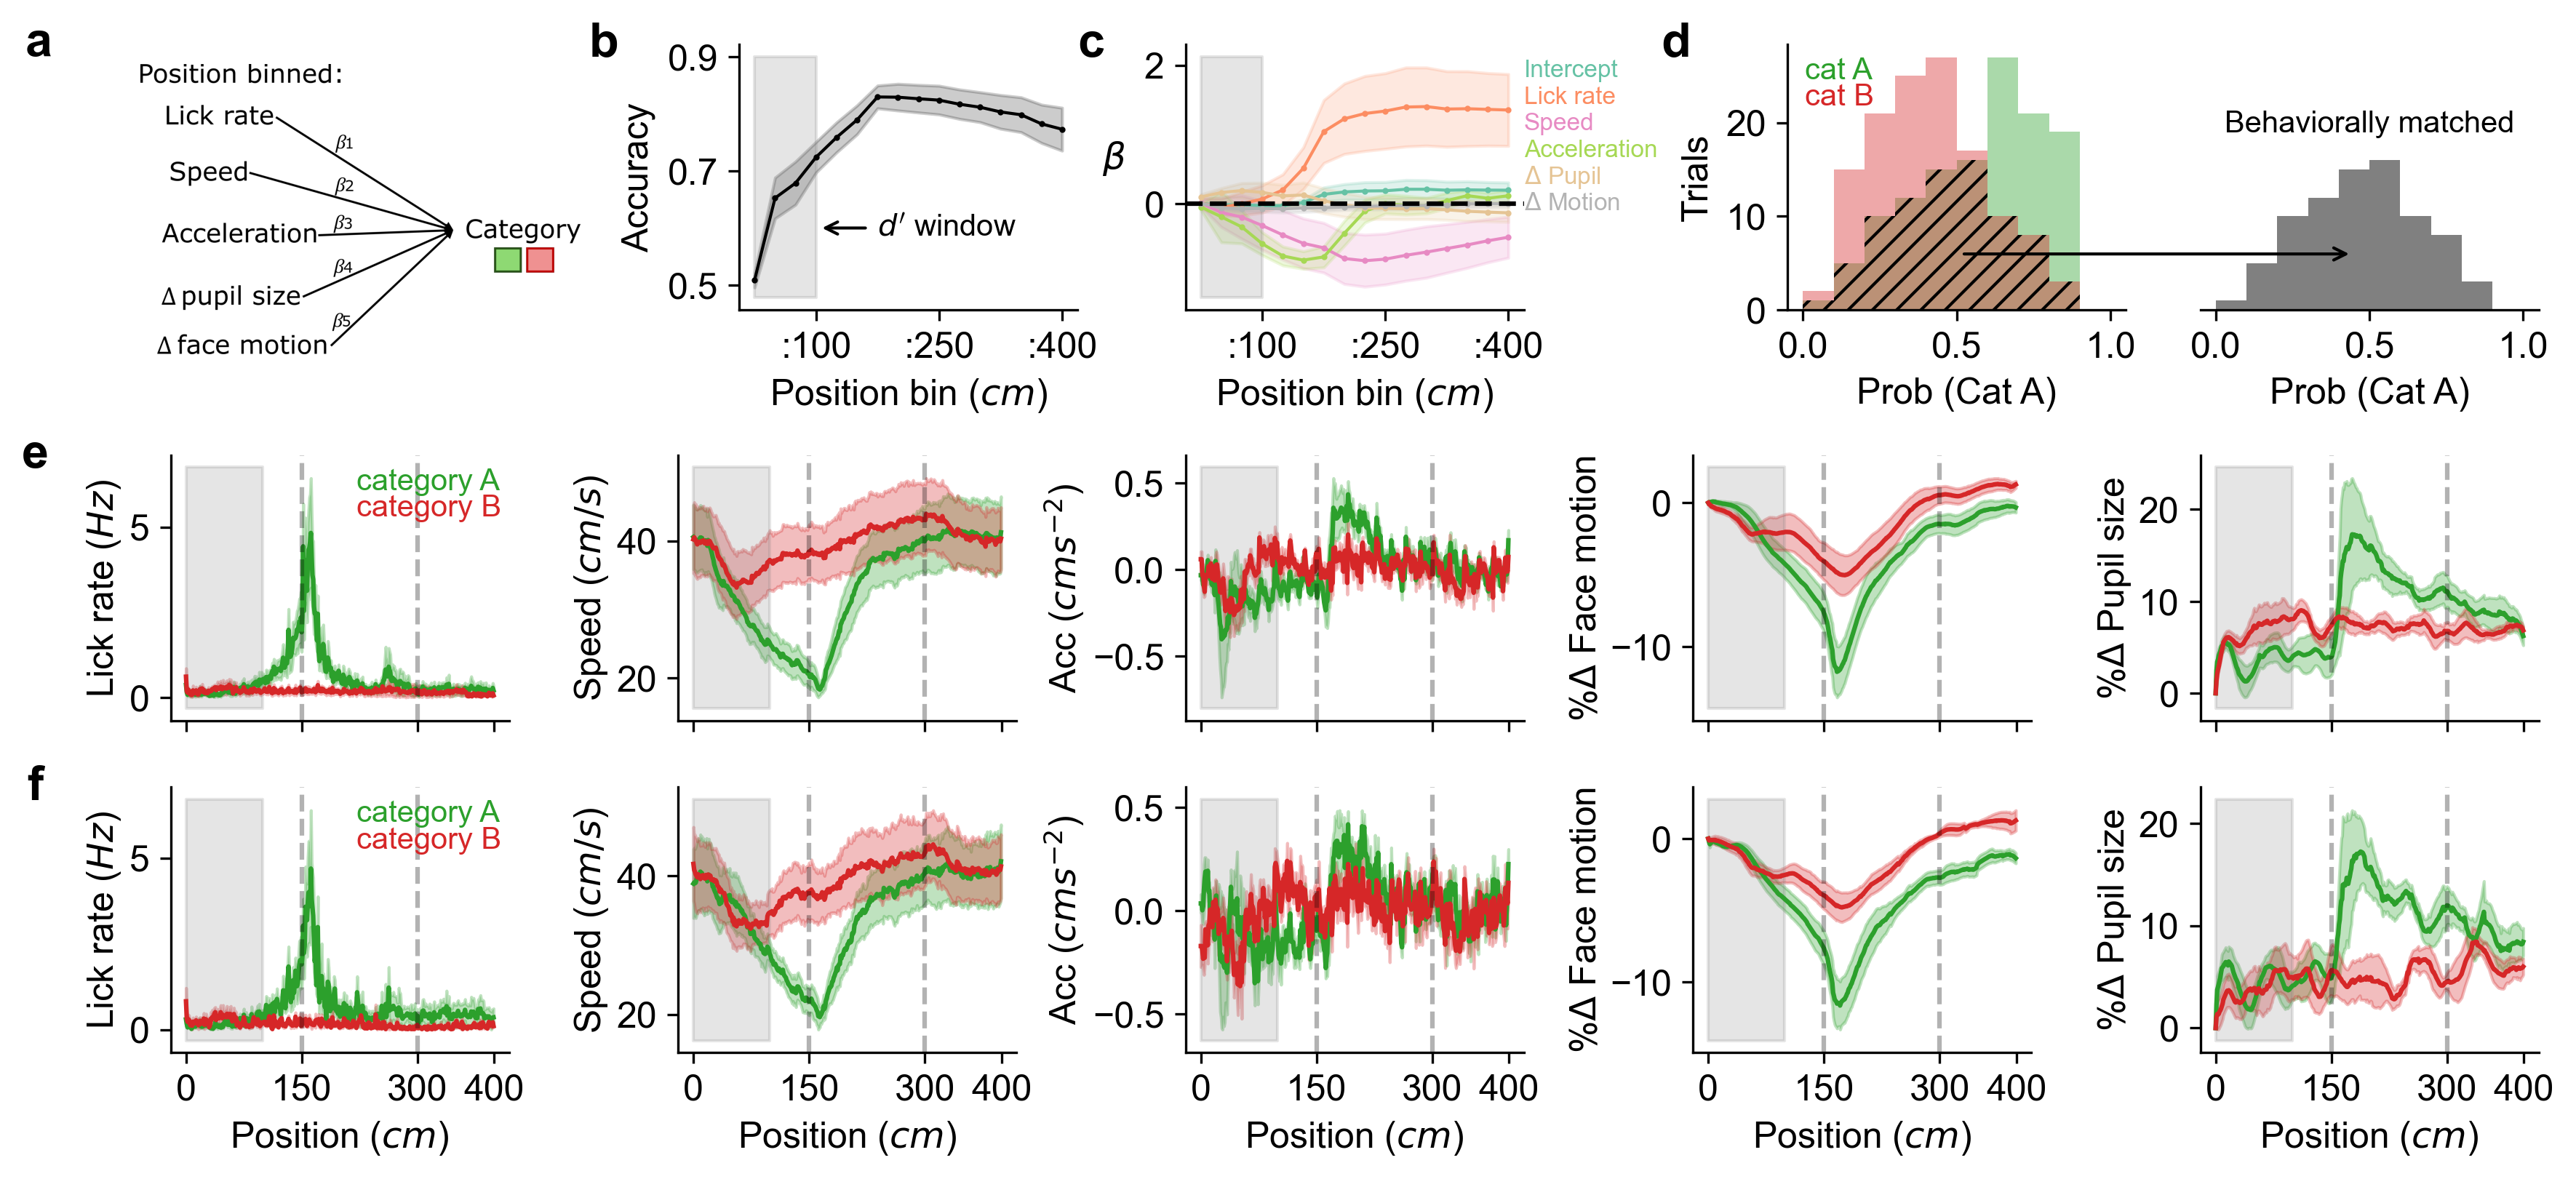

In [9]:
supp = plt.figure(figsize=(14, 6), dpi=300)
grid1 = GridSpec(3, 5, figure=supp, wspace=0.5, hspace=0.4)
supp_axs = grid1.subplots().flatten()
fig1.accuracy_plot(overall_acc, supp_axs[1])
supp_axs[1].annotate(
   "$d'$ window",           # The text
    xy=(3, .6),                  # Arrow tip (x, y)
    xytext=(6, .6),    # Text location (x_text, y_text)
    arrowprops=dict(arrowstyle="->", color="black"),
    fontsize=10, ha='left', va='center', transform=supp_axs[1].transData
)
fig1.betas_plot(overall_betas, supp_axs[2], legend=True)
fig1.plot_matched_trials(overall_prob[0], catA, catB, supp_axs[3], supp_axs[4])
for i_f, f in enumerate(f_labels):
    fig1.plot_catvsbehav(non_matched_features[:,i_f,0], non_matched_features[:,i_f,1], f_labels[i_f], False, supp_axs[i_f+5], legend=False)
    supp_axs[i_f+5].set_xticklabels([])
    fig1.move_axis(supp_axs[i_f+5], vdx=-0.03)
    fig1.plot_catvsbehav(matched_features[:,i_f,0], matched_features[:,i_f,1], f_labels[i_f], True, supp_axs[i_f+10], legend=False)
fig1.move_axis(supp_axs[3], hdx=0.031)

supp_axs[3].text(0.05,.9, "cat A", ha='left', va='center', fontsize=10,
                            color='tab:green', transform=supp_axs[3].transAxes)
supp_axs[3].text(0.05,.8, "cat B", ha='left', va='center', fontsize=10,
                            color='tab:red', transform=supp_axs[3].transAxes)

supp_axs[5].text(.55,.9, "category A", ha='left', va='center', fontsize=10,
                            color='tab:green', transform=supp_axs[5].transAxes)
supp_axs[5].text(.55,.8, "category B", ha='left', va='center', fontsize=10,
                            color='tab:red', transform=supp_axs[5].transAxes)
supp_axs[10].text(.55,.9, "category A", ha='left', va='center', fontsize=10,
                            color='tab:green', transform=supp_axs[10].transAxes)
supp_axs[10].text(.55,.8, "category B", ha='left', va='center', fontsize=10,
                            color='tab:red', transform=supp_axs[10].transAxes)
fig1.show_image(supp_axs[0], r"C:\Users\labadmin\Pictures\reg_sk.png")
fig1.move_axis(supp_axs[0], hdx=-0.01, vdx=-0.05, heightdx=1.3, widthdx=1.3)
fig1.move_axis(supp_axs[1], hdx=0.02)
fig1.add_panel_label(supp_axs[0], 'a', x=-.23, y=1.07, fontsize=16, fontweight='bold')
fig1.add_panel_label(supp_axs[1], 'b', x=-.4, y=1, fontsize=16, fontweight='bold')
fig1.add_panel_label(supp_axs[2], 'c', x=-.28, y=1, fontsize=16, fontweight='bold')
fig1.add_panel_label(supp_axs[3], 'd', x=-.33, y=1, fontsize=16, fontweight='bold')
fig1.add_panel_label(supp_axs[5], 'e', x=-.4, y=1, fontsize=16, fontweight='bold')
fig1.add_panel_label(supp_axs[10], 'f', x=-.4, y=1, fontsize=16, fontweight='bold')
plt.savefig(r"C:\Users\labadmin\Documents\category-neural\results\supp1.pdf", dpi=300, bbox_inches='tight')

In [29]:
gis_first.shape

(7, 4, 2)

Text(0, 0.5, 'Invariance index (a.u.)')

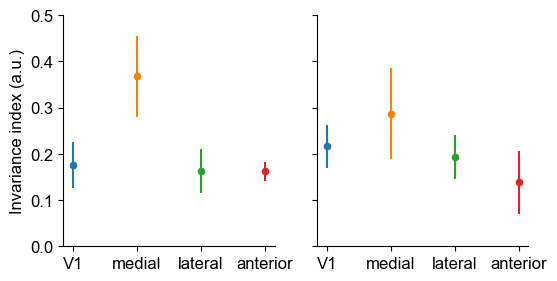

In [44]:
from scipy.stats import sem, ttest_rel, ttest_ind
#plot mean and sem
fig, ax = plt.subplots(1, 2, figsize=(6, 3), sharey=True)
for a in range(4):
    for ctp in range(2):
        mean = np.mean(gis_first[:, a, ctp], axis=0)
        sem_ = sem(gis_first[:, a, ctp], axis=0)
        ax[ctp].scatter(a, mean, alpha=1, s=20)
        ax[ctp].errorbar(a, mean, yerr=sem_, alpha=1)
        ax[ctp].set_xticks(range(4), areas)
        ax[ctp].set_ylim(0, .5)
ax[0].set_ylabel("Invariance index (a.u.)")
#test for significance


In [57]:
comp = [(1,0), (1,2), (1,3)]

In [61]:
# test for normality in each area
from scipy.stats import shapiro,  wilcoxon
for a in range(4):
    for ctp in range(2):
        gis_data = gis_first[:, a, ctp]
        stat, p = shapiro(gis_data)
        print(f"Area: {areas[a]}, Ctype: {ctp}, W={stat:.2f}, p={p:.3f}")
        if p < 0.05:
            print("Data is not normally distributed")
        else:
            print("Data is normally distributed")


Area: V1, Ctype: 0, W=0.89, p=0.251
Data is normally distributed
Area: V1, Ctype: 1, W=0.94, p=0.608
Data is normally distributed
Area: medial, Ctype: 0, W=0.91, p=0.430
Data is normally distributed
Area: medial, Ctype: 1, W=0.96, p=0.850
Data is normally distributed
Area: lateral, Ctype: 0, W=0.93, p=0.550
Data is normally distributed
Area: lateral, Ctype: 1, W=0.93, p=0.566
Data is normally distributed
Area: anterior, Ctype: 0, W=0.77, p=0.023
Data is not normally distributed
Area: anterior, Ctype: 1, W=0.97, p=0.931
Data is normally distributed


In [66]:
for ic, c in enumerate(comp):
    if ic < 2:
        t, p = ttest_rel(gis_first[:, c[0], 0], gis_first[:, c[1], 0], alternative='greater')
        print(f"First day: {areas[c[0]]} vs {areas[c[1]]}: t={t:.2f}, p={p:.3f}")
    else:
        t, p = wilcoxon(gis_first[:, c[0], 0], gis_first[:, c[1], 0],  alternative='greater')
        print(f"First day: {areas[c[0]]} vs {areas[c[1]]}: U={t:.2f}, p={p:.3f}",)

First day: medial vs V1: t=4.80, p=0.002
First day: medial vs lateral: t=4.12, p=0.003
First day: medial vs anterior: U=25.00, p=0.039
